# In this notebook we show the functioning of the Adaptive Binomial ID Estimator (ABIDE) and the Adaptive Gride (AGRIDE)

In [11]:
import numpy as np
import scipy
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
rng = np.random.default_rng(0)
from dadapy import data as dt

## We first show their behaviour on a toy model: a 1 dimensional noisy, curved stripe in 2d (sketch)

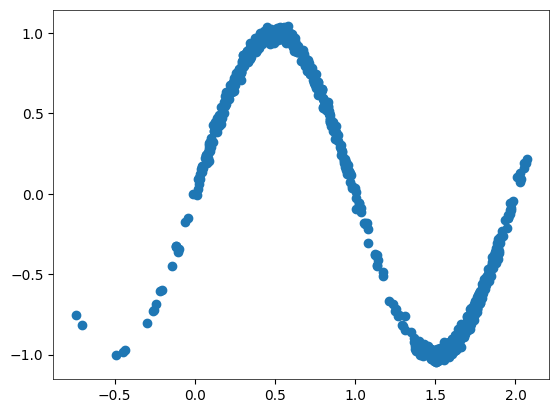

In [12]:
X_base = np.r_[rng.normal(np.pi/2,1,size=500), rng.normal(1.675*np.pi,0.5,size=500)]
Y = np.sin(X_base) + rng.normal(0,0.025,size=1000)
X = np.c_[X_base/np.pi,Y]
plt.scatter(*X.T)

### First we plot the ID as a function of the iteration

In [13]:
#  we compute the distances between points
data = dt.Data(X)
data.compute_distances(maxk=len(X)-1)#,period=1)

In [14]:
# and select the d_threshold used in the likelihood ratio test
alpha = np.logspace(-6,-1,11)
d_thr = scipy.stats.chi2(1).isf(alpha)
alpha, d_thr

(array([1.00e-06, 3.16e-06, 1.00e-05, 3.16e-05, 1.00e-04, 3.16e-04,
        1.00e-03, 3.16e-03, 1.00e-02, 3.16e-02, 1.00e-01]),
 array([23.93, 21.72, 19.51, 17.32, 15.14, 12.97, 10.83,  8.71,  6.63,
         4.62,  2.71]))

In [15]:
# run abide routine
abide = data.return_ids_kstar_binomial(Dthr=d_thr[8],n_iter=8)

iteration  0
id  1.8917996159812445
iteration  1
id  1.3699296281597306
iteration  2
id  1.2314265819687602
iteration  3
id  1.2155229255198854
iteration  4
id  1.2069869816103913
iteration  5
id  1.2057471687716776
iteration  6
id  1.2061246832961419
iteration  7
id  1.2058982109514014


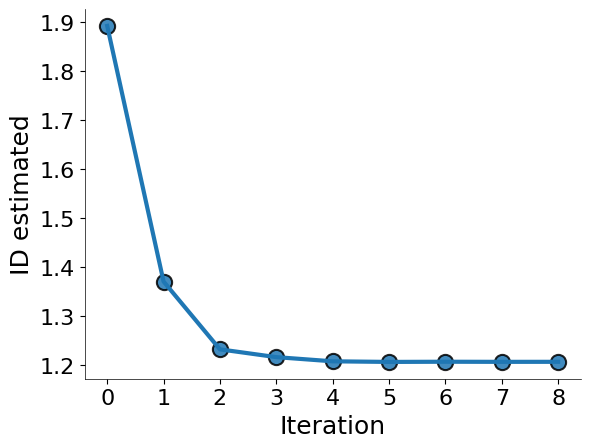

In [16]:
# and plot the ID
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Iteration", size=18)
plt.ylabel("ID estimated", size=18)
plt.plot(abide[0],lw=3)
plt.scatter(range(0,len(abide[0])), abide[0], alpha=0.85, s=120, edgecolors='k',lw=1.5)
mpl.rcParams['axes.linewidth'] = 0.5
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

### We then look at how the distribution of kstars evolve

(-2.0, 270.0)

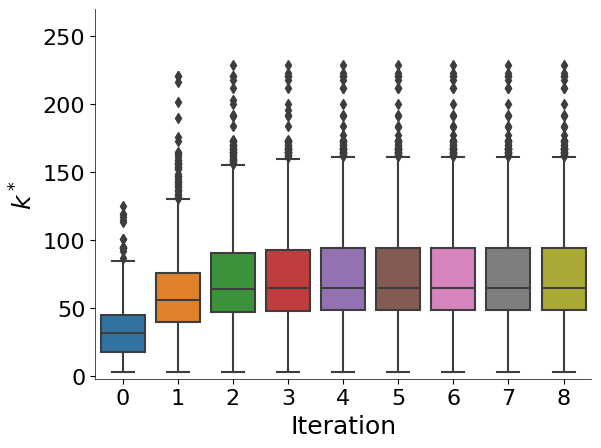

In [17]:
import seaborn as sns

temp = [list(aa) for aa in abide[2]]

sns.boxplot(data=temp)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.xlabel("Iteration", size=18)
plt.ylabel("$k^*$", size=18)
plt.ylim(-2,270)
#plt.hlines(220,0,5)
#plt.savefig("./sketch/kstar_box_half_bord.pdf")

### and how the neighbourhoods' size evolve accordingly

In [18]:
Rk_stars = np.array([[data.distances[i,ks] for i,ks in enumerate(K)] for K in abide[2]])
pt1 = 24
kstar = np.r_[abide[2][:,pt1],abide[2][-1,pt1]]
print(kstar)

[39 60 82 82 82 82 82 82 82 82]


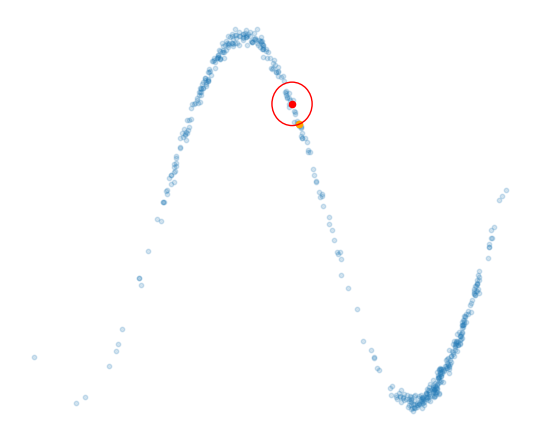

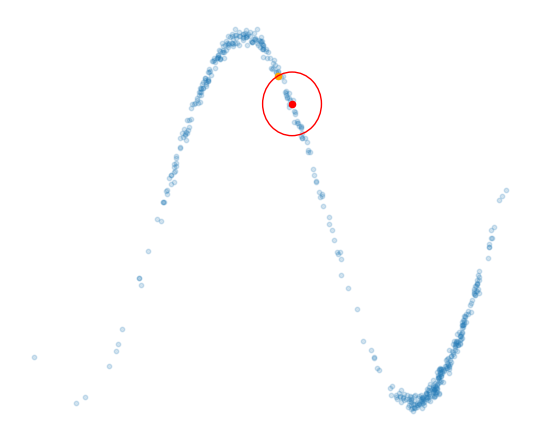

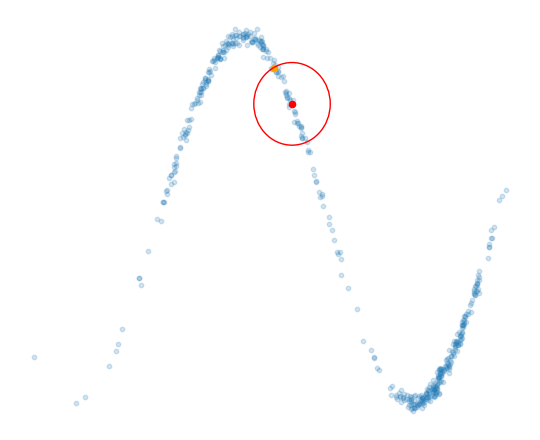

In [19]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(5.5,4.5),frameon=False)
    plt.box(False)
    outer = plt.Circle(X[pt1],Rk_stars[i,pt1],color = 'r',fill=False,clip_on=False)
    #inner = plt.Circle(X[pt2],Rk_stars[i,pt2],color = 'r',fill=False,clip_on=False)
    
    ax.scatter(*X[::2].T,alpha=0.2,s=10)#,c=Rk_stars[i])
    
    ax.scatter(*X[pt1].T,color='r',s=20)
    ax.scatter(*X[data.dist_indices[pt1,abide[2][i,pt1]]].T,color='orange',s=20)
    
    #ax.scatter(*X[pt2].T,color='r',s=20)
    #ax.scatter(*X[data.dist_indices[pt2,abide[2][i,pt2]]].T,color='orange',s=20)
    
    ax.add_patch(outer)
    #ax.add_patch(inner)
    ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)

    #fig.patch.set_visible(False)
    #ax = fig.add_axes([0, 0, 1, 1])
    #ax.axis('off')
    plt.tight_layout()

### The same quantities using AGRIDE instead. It typically appear to be more "aggressive", as the obtained ID are generally a bit lower than the ones found woth the binomial estimator

In [20]:
agride = data.return_ids_kstar_gride(Dthr=d_thr[8],n_iter=10)

iteration  0
id  1.8917996159812445
iteration  1
id  1.2993269520855104
iteration  2
id  1.1206574350127776
iteration  3
id  1.0471229556080945
iteration  4
id  1.019698327178048
iteration  5
id  0.9960101611808934
iteration  6
id  0.9907974957357801
iteration  7
id  0.9905813709069333
iteration  8
id  0.9905812544917278
iteration  9
id  0.9905812544917278


## Next example, a various gaussian distribution on a homogoenous background, twisted and embedded in high dimesionality

In [21]:
X = np.loadtxt('./datasets/Fig1_mobius.dat')
noise = 1e-3
X_noise = np.c_[X+rng.normal(scale=noise,size=(X.shape)),rng.normal(scale=noise,size=(len(X),17))]
data = dt.Data(X_noise)
data.compute_distances(maxk=2000)

In [22]:
abide = data.return_ids_kstar_binomial(Dthr=scipy.stats.chi2(1).isf(1e-2),n_iter=10)

iteration  0
id  4.7114283273654305
iteration  1
id  2.8048679469301288
iteration  2
id  2.4180398538376053
iteration  3
id  2.3689969436440292
iteration  4
id  2.366900837393024
iteration  5
id  2.3664032626642615
iteration  6
id  2.366402914828026
iteration  7
id  2.3664025669918423
iteration  8
id  2.366402219155709
iteration  9
id  2.3664018713196273


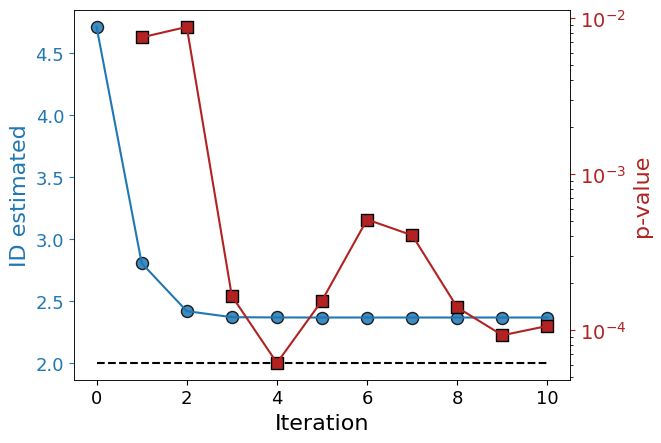

In [23]:
# show the ID and the associated pvalues
fig, ax1 = plt.subplots()

c_left = "tab:blue"
c_right = "firebrick"

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

# left y axis
ax1.set_xlabel("Iteration", size=16)
ax1.set_ylabel("ID estimated", size=16, c=c_left)
ax1.tick_params(axis="y", colors=c_left)
# ID vs iter
ax1.plot(abide[0],c=c_left)
ax1.scatter(range(0,len(abide[0])), abide[0], alpha=0.85, c=c_left, s=75, edgecolors='k')

ax1.hlines(2,0,len(abide[0])-1,'k',linestyles='dashed')

# right y axis
ax2 = ax1.twinx()
ax2.set_ylabel("p-value", size=16, c=c_right)
ax2.tick_params(axis="y", labelsize=14, colors=c_right)
ax2.set_yscale("log")
# pvals
plt.plot(range(1,len(abide[3])),abide[3][1:],c=c_right)
ax2.scatter(range(1,len(abide[3])), abide[3][1:], marker="s", color=c_right, s=75, edgecolors='k', label='es mean')

### Let's see how the estimator behaves as a function of the noise added to the dataset

In [24]:
def noise_routine(noise, D_thr=scipy.stats.chi2(1).isf(1e-2)):
    
    X = np.loadtxt('datasets/Fig1_mobius.dat')
    X_noise = np.c_[X+rng.normal(scale=noise,size=(X.shape)),rng.normal(scale=noise,size=(len(X),17))]
    
    data = dt.Data(X_noise)
    data.compute_distances(maxk=2000)
    # 2nn estimates
    data.compute_id_2NN(algorithm='ml')
    id0 = data.intrinsic_dim
    err_id0 = data.intrinsic_dim_err
    # abide
    a_id, a_err, a_k, pv = data.return_ids_kstar_binomial(n_iter=7,Dthr=D_thr);
    
    return id0, err_id0, a_id[-1], a_err[-1], pv[-1]

In [25]:
noise = np.logspace(-4.,-2.,15)

In [26]:
# Run the routine for each noise level, and store the results
# Note: this will take a while to run, approximately 5 minutes

id_2nn = []
err_2nn = []
id_abide = []
err_abide = []
pv = []
for n in noise:
    a = noise_routine(n)
    id_2nn.append(a[0])
    err_2nn.append(a[1])
    id_abide.append(a[2])
    err_abide.append(a[3])
    pv.append(a[4])

iteration  0
id  2.1834276394209526
iteration  1
id  1.9759066020657023
iteration  2
id  1.9733908927988555
iteration  3
id  1.973438303311595
iteration  4
id  1.9734513021291822
iteration  5
id  1.973441316882104
iteration  6
id  1.9734543157195417
iteration  0
id  2.300663820059066
iteration  1
id  1.9811479605154836
iteration  2
id  1.9763121728727848
iteration  3
id  1.9760902174784447
iteration  4
id  1.9760757348623956
iteration  5
id  1.9760748910751587
iteration  6
id  1.9760740472882823
iteration  0
id  2.459542379055897
iteration  1
id  1.990111243154725
iteration  2
id  1.9843236057874964
iteration  3
id  1.9845034234609475
iteration  4
id  1.9844111887986964
iteration  5
id  1.9844444722164722
iteration  6
id  1.9844455235219973
iteration  0
id  2.683119161598278
iteration  1
id  2.011622041039685
iteration  2
id  1.9973610619327749
iteration  3
id  1.99724918874208
iteration  4
id  1.997251941725208
iteration  5
id  1.997250094135771
iteration  6
id  1.9972528471201467
ite

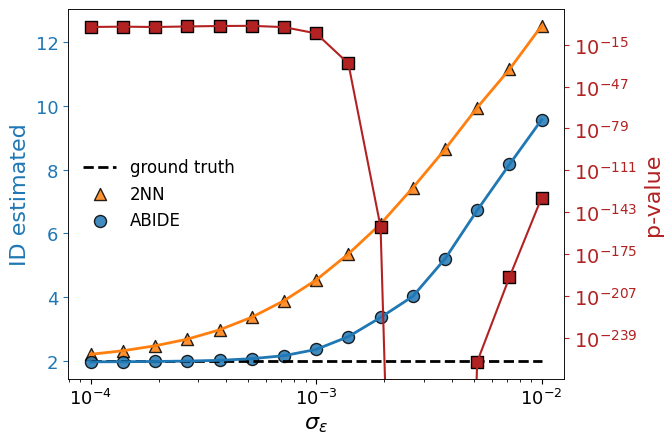

In [31]:
fig, ax1 = plt.subplots()

c_left = "tab:blue"
c_right = "firebrick"

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xscale('log')

# left y axis
ax1.set_xlabel(r"$\sigma_\epsilon$", size=16)
ax1.set_ylabel("ID estimated", size=16, c=c_left)
ax1.tick_params(axis="y", colors=c_left)
# ID vs noise
# reference
ax1.hlines(2,noise[0],noise[-1],'k',linestyles='dashed',label='ground truth',lw=2)
# 2NN
ax1.plot(noise,id_2nn,lw=2,c='tab:orange')
ax1.scatter(noise, id_2nn, alpha=0.85, c='tab:orange', marker='^',s=75, edgecolors='k',label='2NN')
# ABIDE
ax1.plot(noise,id_abide,lw=2,c=c_left)
ax1.scatter(noise, id_abide, alpha=0.85, c=c_left, s=75, edgecolors='k',label='ABIDE')

ax1.legend(fontsize=12,frameon=False,loc='center left')

# right y axis
ax2 = ax1.twinx()
ax2.set_ylabel("p-value", size=16, c=c_right)
ax2.tick_params(axis="y", labelsize=14, colors=c_right)
ax2.set_yscale("log")
# pvals
ax2.plot(noise,pv,c=c_right)
ax2.scatter(noise, pv, marker="s", color=c_right, s=75, edgecolors='k',label='es mean')

## MNIST

In [28]:
# MNIST dataset analysis. Note: this will take a while to run, approximately 2-3 minutes
from sklearn.datasets import fetch_openml

tmp = fetch_openml(
    "mnist_784", version=1, return_X_y=False, as_frame=False#, parser="pandas"
)
X = tmp.data
y = tmp.target
print(X.shape)

(70000, 784)


In [29]:
X = X[y=='0']
print(X.shape)
X = X-X.mean()
X = X/X.std()
data = dt.Data(X, maxk=min(2000,X.shape[0]-1))
data.compute_distances()

(6903, 784)


Text(0, 0.5, 'ID Estimated')

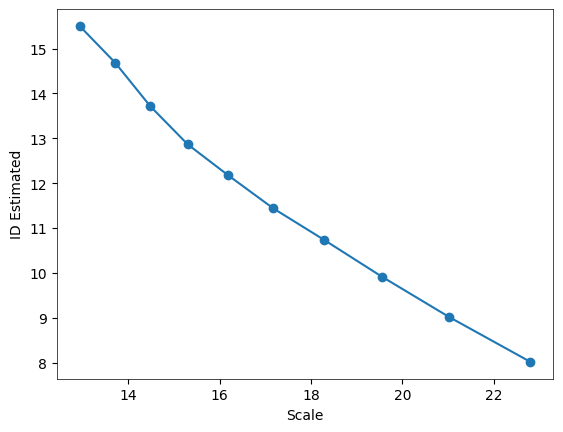

In [30]:
id_gride = data.return_id_scaling_gride(range_max=1024)
plt.plot(id_gride[2],id_gride[0])
plt.scatter(id_gride[2],id_gride[0])
plt.xlabel("Scale")
plt.ylabel("ID Estimated")

#### As you can observe, in this example it isnot possible to find a plateau using gride or decimation, meaning that it is not possible to identify the proper scale and the corresponding ID. Let's use ABIDE and AGRIDE then! The scale will be point dependent

In [32]:
abide = data.return_ids_kstar_binomial(Dthr=scipy.stats.chi2(1).isf(1e-2),n_iter=10)

iteration  0
id  15.565728449995584
iteration  1
id  13.151250533624786
iteration  2
id  13.122937983687397
iteration  3
id  13.12730719615476
iteration  4
id  13.125552117762645
iteration  5
id  13.126234353773517
iteration  6
id  13.126916625245444
iteration  7
id  13.126174380182164
iteration  8
id  13.126856648536801
iteration  9
id  13.126114406864833


In [33]:
agride = data.return_ids_kstar_gride(Dthr=scipy.stats.chi2(1).isf(1e-2),n_iter=10)

iteration  0
id  15.565728449995584
iteration  1
id  12.882294486626542
iteration  2
id  12.67308029720353
iteration  3
id  12.630905338379407
iteration  4
id  12.632982651304772
iteration  5
id  12.629406900062953
iteration  6
id  12.632912627558717
iteration  7
id  12.630166392863057
iteration  8
id  12.632912627558717
iteration  9
id  12.630166392863057


(array([3282., 1268., 1208.,  528.,  385.,  111.,   89.,   21.,    7.,
           4.]),
 array([ 3. ,  5.5,  8. , 10.5, 13. , 15.5, 18. , 20.5, 23. , 25.5, 28. ]),
 <BarContainer object of 10 artists>)

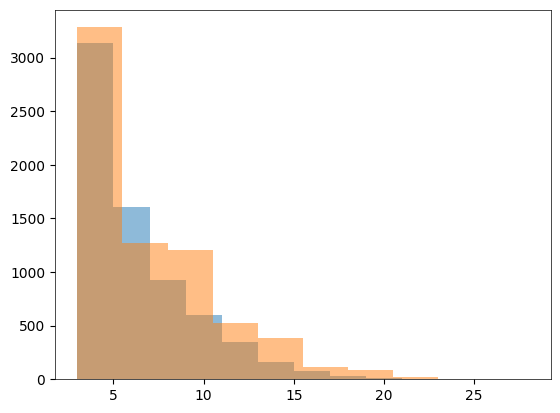

In [34]:
# let's see how the distribution of k* changes
plt.hist(abide[2][0],label="ID from 2nn",alpha=0.5)
plt.hist(abide[2][-1],label="ID from agride",alpha=0.5)